# XGBOOST 
- 설명 및 mac다운로드 : https://www.youtube.com/watch?v=Dhwmd_IyW3g
- 윈도우다운로드 : http://quantfactory.blogspot.com/2017/04/xgboost.html
- Decision Tree -> Boosted Decision Tree -> AdaBoost -> Gradient Boost -> XGBoost -> lightGBM

# 1. 파이썬 library 불러오기 

In [69]:
# Python libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import itertools
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, roc_curve, precision_recall_curve
import warnings

# 2. 데이터 불러오기 

In [70]:
train = pd.read_csv("C:/Users/kimjimin/Desktop/bcbc/n_ay1/n_ay1.csv")
test = pd.read_csv("C:/Users/kimjimin/Desktop/bcbc/champion_data/test/test_activity.csv")
combined = train.append(test)
train.shape, test.shape, combined.shape #train,test의 행과열 감상 

((440323, 39), (175631, 38), (615954, 39))

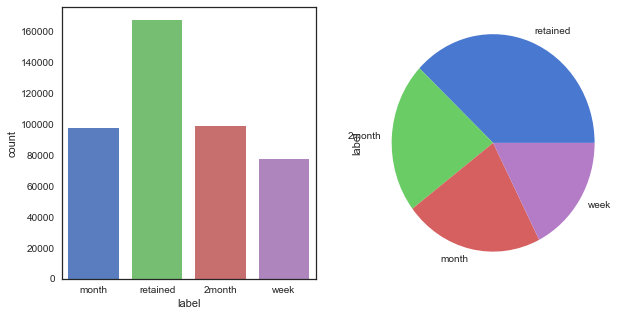

In [71]:
Target = train.label
fig, ax = plt.subplots(1,2,figsize=(10,5),)
sns.countplot(x=Target,ax=ax[0])
train.label.value_counts().plot(kind="pie")
# In training set, the more passenger were dead.

In [72]:
#one-hot-encoding-2
train.loc[train["label"] == "retained", "label"] = 0
train.loc[train["label"] == "2month", "label"] = 1
train.loc[train["label"] == "month", "label"] = 1
train.loc[train["label"] == "week", "label"] = 1 

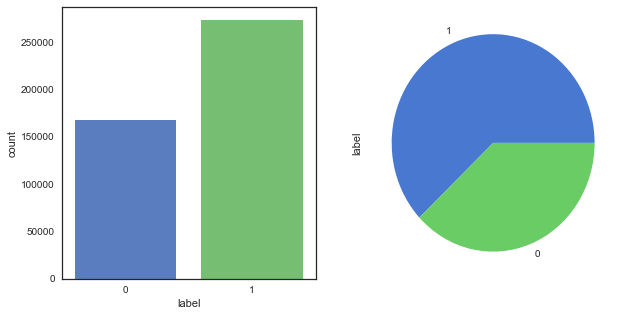

In [73]:
Target = train.label
fig, ax = plt.subplots(1,2,figsize=(10,5),)
sns.countplot(x=Target,ax=ax[0])
train.label.value_counts().plot(kind="pie")
# In training set, the more passenger were dead.

In [74]:
# confusion matrix 
def plot_confusion_matrix(cm, classes,
                          normalize = False,
                          title = 'Confusion matrix"',
                          cmap = plt.cm.Blues) :
    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 0)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])) :
        plt.text(j, i, cm[i, j],
                 horizontalalignment = 'center',
                 color = 'white' if cm[i, j] > thresh else 'black')

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [75]:
def show_metrics():
    tp = cm[1,1]
    fn = cm[1,0]
    fp = cm[0,1]
    tn = cm[0,0]
    print('Precision =     {:.3f}'.format(tp/(tp+fp)))
    print('Recall    =     {:.3f}'.format(tp/(tp+fn)))
    print('F1_score  =     {:.3f}'.format(2*(((tp/(tp+fp))*(tp/(tp+fn)))/
                                                 ((tp/(tp+fp))+(tp/(tp+fn))))))

In [76]:
# def X and Y
X = train.drop(['acc_id','label'], axis=1).values
y = train.label.values
test_id = test.acc_id.values
test = test.drop('acc_id', axis=1)

In [77]:
# Stratified k-folds
skf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)
for train_index, test_index in skf.split(X, y):
    X_train, y_train = X[train_index], y[train_index]
    X_test, y_test = X[test_index], y[test_index]

In [79]:
xgb_cfl = xgb.XGBClassifier(n_jobs = -1, 
                            n_estimators = 200)

xgb_cfl.fit(X_train, y_train)
y_pred = xgb_cfl.predict(X_test)
y_score = xgb_cfl.predict_proba(X_test)[:,1]

# Confusion maxtrix & metrics
cm = confusion_matrix(y_test, y_pred)
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cm, 
                      classes = class_names, 
                      title = 'XGB Confusion matrix')
plt.savefig('2.xgb_cfl_confusion_matrix.png')
plt.show()

show_metrics()

ValueError: unknown is not supported